In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns

pd.set_option('display.float_format', '{:.2f}'.format)
sns.set_theme()
sns.set_style("whitegrid")

In [2]:
# import usage
usage = pd.read_feather('bixi_usage_2023_cleaned.feather')
stations = pd.read_feather('stations_2023_altitude.feather')

In [3]:
stations.head()

,name,latitude,longitude,arrondissement,altitude_m
station_id,,,,,
1,Métro Mont-Royal (Utilités publiques / Rivard),45.5242361,-73.5815522,Le Plateau-Mont-Royal,48.31
2,Rielle / Wellington,45.4601559,-73.5670012,Verdun,14.77
3,Ste-Catherine / Drummond,45.4985885,-73.5742781,Ville-Marie,39.33
4,Boyer / du Mont-Royal,45.527432,-73.579917,Le Plateau-Mont-Royal,47.48
5,Clark / Ontario,45.5106246,-73.5669033,Ville-Marie,26.36


In [4]:
# filter unknown pickup or dropoff
usage = usage[(usage['end_station_id'] != -1) &
        (usage['start_station_id'] != -1)]

In [5]:
df = usage.merge(stations['altitude_m'].rename('altitude_m_start'), how='left', left_on='end_station_id', right_index=True)
df = df.merge(stations['altitude_m'].rename('altitude_m_end'), how='left', left_on='start_station_id', right_index=True)

In [6]:
df.head()

,start_station_id,end_station_id,duration_s,start_timestamp,end_timestamp,hour,altitude_m_start,altitude_m_end
0,1,306,396.00,2023-10-25 16:44:56.468000-04:00,2023-10-25 16:51:32.113000-04:00,16,46.44,48.31
1,2,215,1432.00,2023-10-25 17:48:55.502000-04:00,2023-10-25 18:12:47.951000-04:00,17,16.45,14.77
2,3,287,286.00,2023-10-25 22:01:45.974000-04:00,2023-10-25 22:06:32.418000-04:00,22,13.22,39.33
3,4,269,324.00,2023-10-25 17:31:29.932000-04:00,2023-10-25 17:36:54.383000-04:00,17,54.62,47.48
4,5,514,434.00,2023-10-25 17:40:06.571000-04:00,2023-10-25 17:47:20.298000-04:00,17,26.16,26.36


In [7]:
df['altitude_diff'] = df['altitude_m_start'] - df['altitude_m_end']
df = df.dropna(subset=['altitude_diff'])

In [8]:
df.head()

,start_station_id,end_station_id,duration_s,start_timestamp,end_timestamp,hour,altitude_m_start,altitude_m_end,altitude_diff
0,1,306,396.00,2023-10-25 16:44:56.468000-04:00,2023-10-25 16:51:32.113000-04:00,16,46.44,48.31,-1.87
1,2,215,1432.00,2023-10-25 17:48:55.502000-04:00,2023-10-25 18:12:47.951000-04:00,17,16.45,14.77,1.68
2,3,287,286.00,2023-10-25 22:01:45.974000-04:00,2023-10-25 22:06:32.418000-04:00,22,13.22,39.33,-26.11
3,4,269,324.00,2023-10-25 17:31:29.932000-04:00,2023-10-25 17:36:54.383000-04:00,17,54.62,47.48,7.14
4,5,514,434.00,2023-10-25 17:40:06.571000-04:00,2023-10-25 17:47:20.298000-04:00,17,26.16,26.36,-0.20


In [9]:
df['altitude_diff'].describe()

count   10991109.00
mean          -2.19
std           17.44
min         -103.24
25%          -10.02
50%           -0.54
75%            5.64
max          103.24
Name: altitude_diff, dtype: float64

<Axes: >

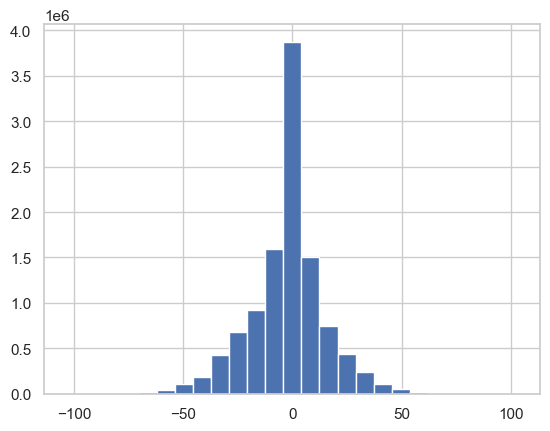

In [10]:
df['altitude_diff'].hist(bins=25)

In [13]:
df.sort_values(by=['altitude_diff'])

,start_station_id,end_station_id,duration_s,start_timestamp,end_timestamp,hour,altitude_m_start,altitude_m_end,altitude_diff
6337120,462,164,1882.00,2023-06-20 17:30:25.487000-04:00,2023-06-20 18:01:47.625000-04:00,17,12.44,115.68,-103.24
4706294,462,164,1433.00,2023-07-20 10:05:44.486000-04:00,2023-07-20 10:29:37.448000-04:00,10,12.44,115.68,-103.24
9271311,462,164,919.00,2023-08-04 13:02:59.776000-04:00,2023-08-04 13:18:19.076000-04:00,13,12.44,115.68,-103.24
2773064,462,164,1679.00,2023-06-15 09:51:20.884000-04:00,2023-06-15 10:19:19.560000-04:00,9,12.44,115.68,-103.24
6618218,462,164,1814.00,2023-08-20 15:58:01.446000-04:00,2023-08-20 16:28:15.660000-04:00,15,12.44,115.68,-103.24
...,...,...,...,...,...,...,...,...,...
8756462,287,462,1739.00,2023-10-20 18:36:42.217000-04:00,2023-10-20 19:05:40.721000-04:00,18,115.68,13.22,102.46
1153509,287,462,1305.00,2023-05-02 21:43:47.735000-04:00,2023-05-02 22:05:32.815000-04:00,21,115.68,13.22,102.46
7714492,427,462,1548.00,2023-04-20 19:42:19.540000-04:00,2023-04-20 20:08:07.671000-04:00,19,115.68,13.20,102.48
1771536,164,462,2001.00,2023-06-15 23:34:22.862000-04:00,2023-06-16 00:07:44.073000-04:00,23,115.68,12.44,103.24


In [16]:
print(stations.loc[462])
print(stations.loc[164])

name              Métro Édouard-Montpetit (du Mont-Royal / Vince...
latitude                                                  45.510086
longitude                                                -73.611429
arrondissement                                            Outremont
altitude_m                                                   115.68
Name: 462, dtype: object
name              de la Commune / King
latitude                     45.497515
longitude                   -73.552571
arrondissement             Ville-Marie
altitude_m                       12.44
Name: 164, dtype: object
